In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

## Exploring data

In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<Axes: >

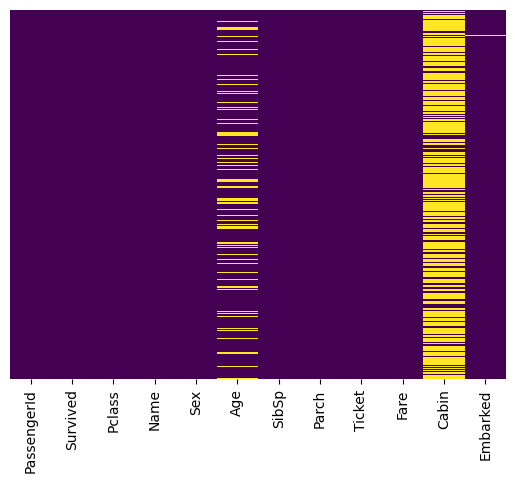

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.shape

(891, 12)

<Axes: xlabel='Survived', ylabel='count'>

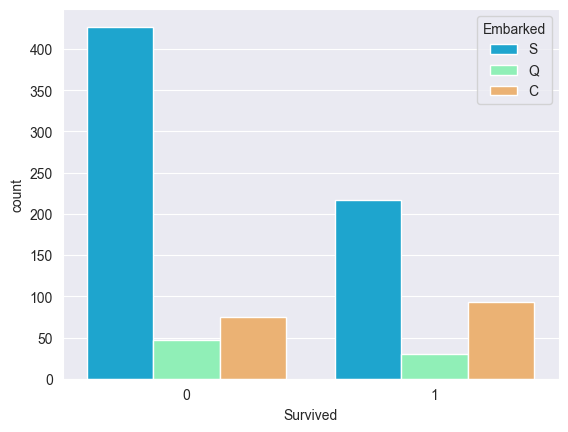

In [7]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Embarked',data=df,palette='rainbow')

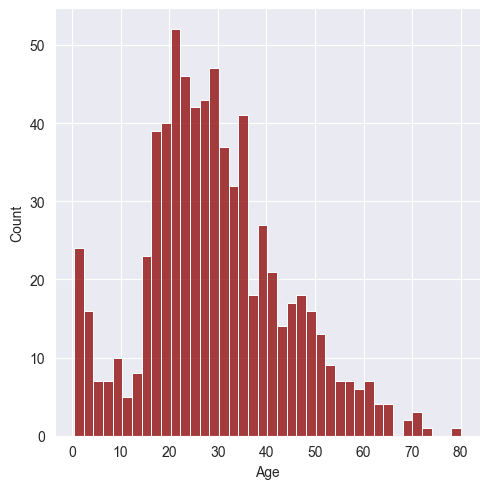

In [8]:
sns.displot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

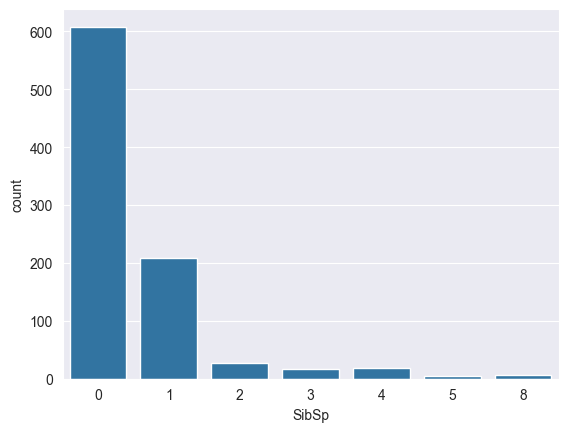

In [9]:
sns.countplot(x='SibSp',data=df)

<Axes: >

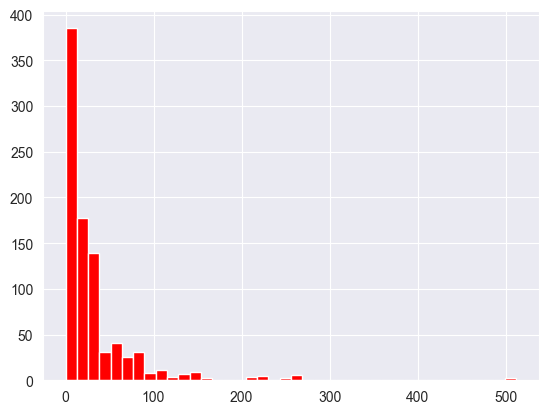

In [10]:
df['Fare'].hist(color='red',bins=40)

### Handling missing data for Cabin


In [11]:

df['Cabin_letter'] = df['Cabin'].str[0]
df['Cabin_letter'] = df['Cabin_letter'].fillna('U')
df.drop(columns=['Cabin'],inplace=True)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,U


In [13]:
df['Cabin_letter'].head()

0    U
1    C
2    U
3    C
4    U
Name: Cabin_letter, dtype: object

In [14]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          2
Cabin_letter      0
dtype: int64

### Handling Missing Embarked

In [15]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [16]:
df['Embarked'] = df['Embarked'].fillna('S')

In [17]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          0
Cabin_letter      0
dtype: int64

### Handling missing Age

C:\Users\Ethereal\AppData\Local\Temp\ipykernel_12736\134525434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

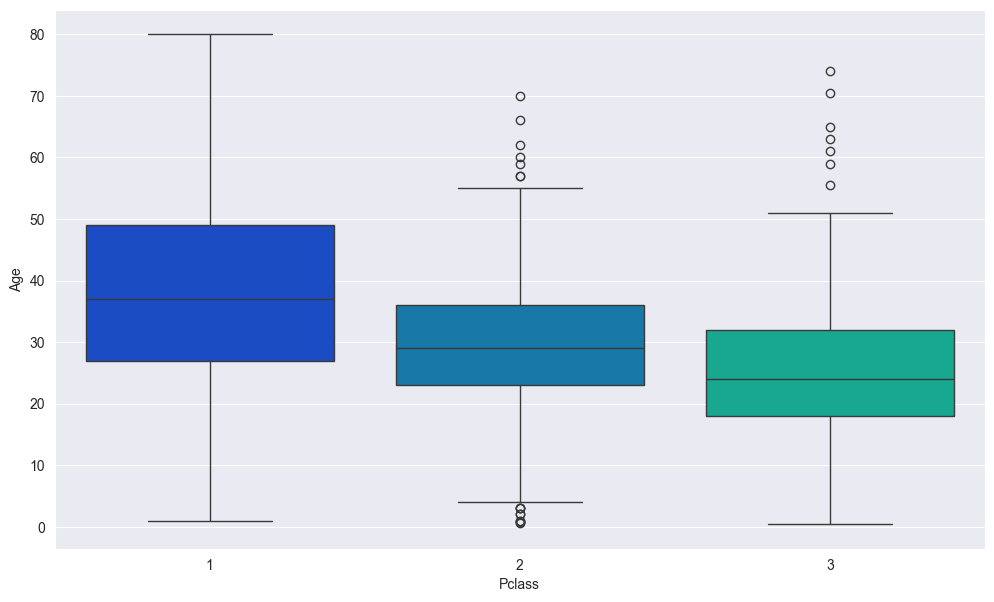

In [18]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [19]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
df.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [21]:
pclass_medians = df.groupby('Pclass')['Age'].median()

In [22]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return pclass_medians[1]
        elif Pclass == 2:
            return pclass_medians[2]
        else:
            return pclass_medians[3]
    else:
        return Age

In [23]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\Ethereal\AppData\Local\Temp\ipykernel_12736\76719767.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Ethereal\AppData\Local\Temp\ipykernel_12736\76719767.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


### Checking for missing datas after missing data handlings

<Axes: >

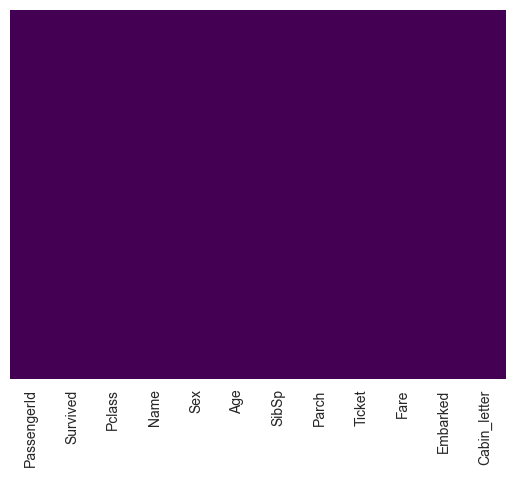

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Pclass', ylabel='count'>

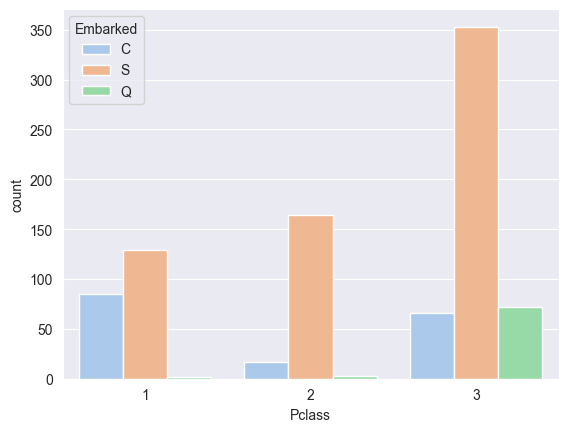

In [25]:
sns.countplot(data=df,x='Pclass',hue='Embarked',palette='pastel')

### Visualizing the outliers

In [26]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", num_cols)

Numerical columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


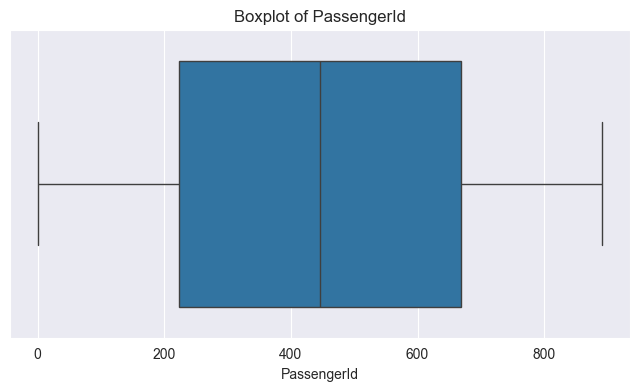

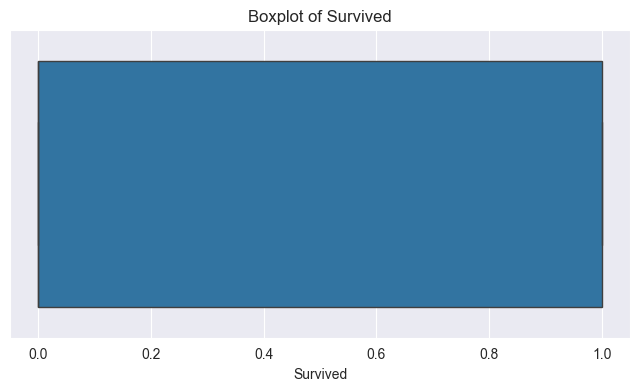

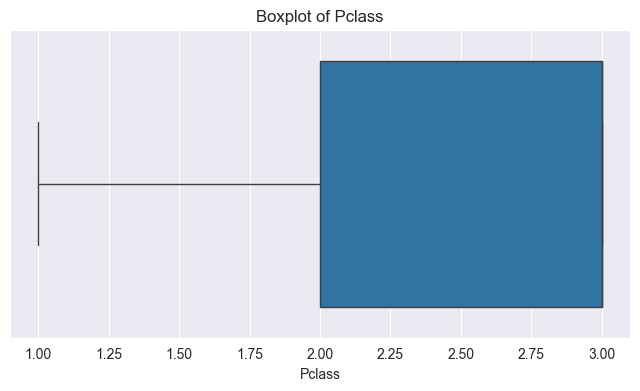

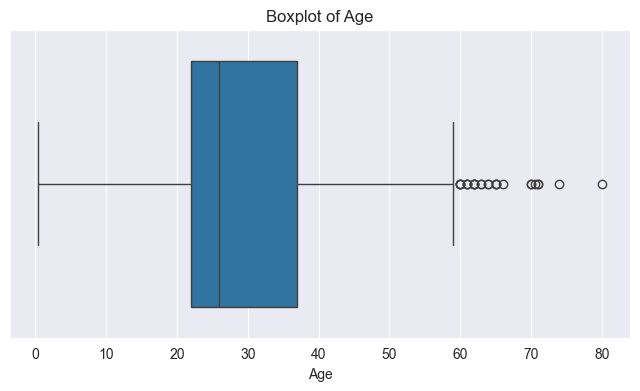

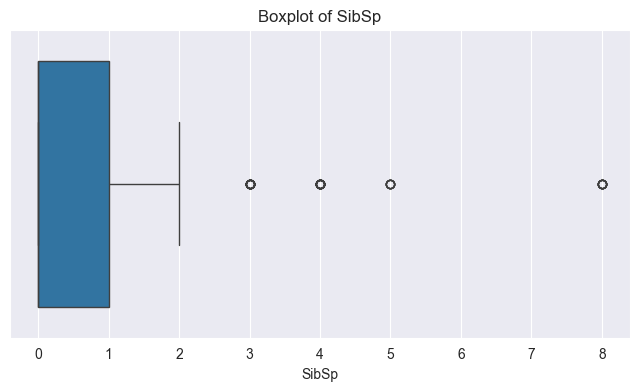

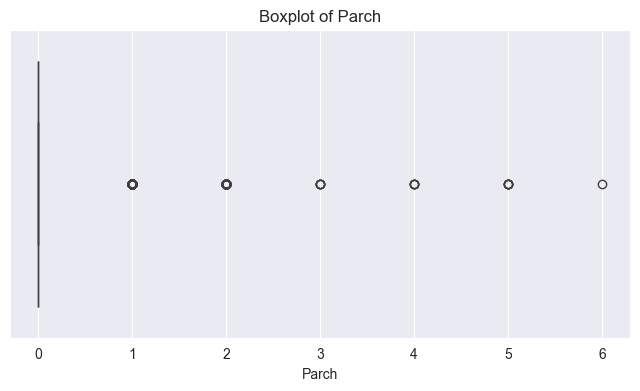

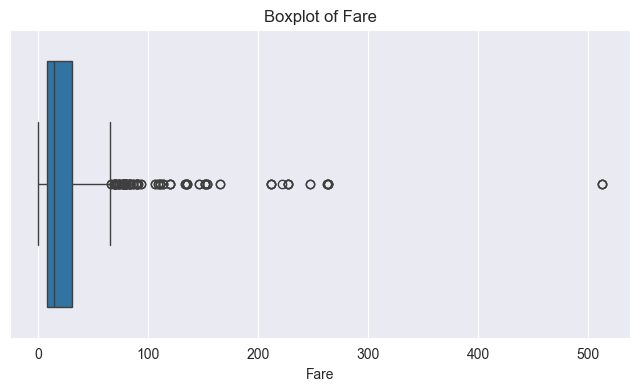

In [27]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


### Handling the outliers

In [28]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

In [29]:
def handle_outliers(df, method='remove'):
    df_out = df.copy()
    for col in num_cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if method == 'remove':
            df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
        elif method == 'cap':
            df_out[col] = df_out[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
        else:
            raise ValueError("Method must be 'remove' or 'cap'")

    return df_out

In [30]:
df = handle_outliers(df,method='cap')

### Encoding categorical data to numeric

In [31]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [32]:
binary_cols = [col for col in categorical_cols if df[col].nunique()==2]
for col in binary_cols:
    unique_vals = df[col].unique()
    df[col] = df[col].map({unique_vals[0]:0,unique_vals[1]:1})
    

In [33]:
df[binary_cols].head()

,Sex
0,0
1,1
2,1
3,1
4,0


In [34]:
# multi_cat_cols = [col for col in categorical_cols if df[col].nunique() > 2]
# df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

# This is the dynamic code, but here we have to select the useful columns only manually. 

### Normalizing the numerical columns

In [35]:
from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])